In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# #Load data from URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# data = pd.read_csv(url,
#                    names= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
#                            'race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income_class'])

# # Save data to CSV file
# data.to_csv('adult_data.csv', index=False)


In [4]:
# Read data from CSV file
data = pd.read_csv('adult_data.csv')

In [5]:
# Original Data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [6]:
# Check for missing values
data.isnull().sum()   #no missing values itseems

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_class      0
dtype: int64

In [7]:
data['income_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_class, dtype: int64

In [8]:
# Create target column using boolean indexing for target
data['target'] = (data['income_class'] == ' >50K').astype(int)

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [10]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
# Drop rows with '?' values
data = data[data['workclass'] != ' ?']
data = data[data['occupation'] != ' ?']

In [12]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [13]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
#create dataframe of dummy variables
diff = data[['workclass','education','marital-status','occupation','relationship','race']]

# one hot encoding for 'workclass' feature
data_onehot_df = pd.get_dummies(diff, prefix=['workclass','education','marital-status','occupation','relationship','race'])

In [ ]:
data_onehot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# dropping unnecessary columns
data.drop(['fnlwgt', "education-num"],axis=1, inplace=True)

In [ ]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [ ]:
data['native-country'].value_counts
data['native-country'] = data['native-country'].astype(str)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [ ]:
# If American = 1, individual is from USA. Else, it is 0.
data["American"] = np.where(data["native-country"] == " United-States", 1,0)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target,American
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


In [ ]:
# combine dummy variables with original data frame
data_concat = pd.concat([data, data_onehot_df], axis=1)
data_concat

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Drop variables that were one hot encoded
data_concat.drop(['workclass', "education", "marital-status", "relationship", "occupation", "race", "sex", "native-country", "income_class"],axis=1, inplace=True)
data_concat = data_concat.reset_index(drop = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# standardizing the quantatative variables. Sets their mean equal to 0, stddev = 1

data_concat2 = data_concat.iloc[:, :4]
data_concat_scaled = pd.DataFrame(scaler.fit_transform(data_concat2))
data_concat_scaled.rename(columns={0: "age", 1: "capital-gain", 2 : "capital-loss", 3 : "hours-per-week"}, inplace = True)
data_concat_scaled.reset_index(drop = True)
data_concat_scaled

data_concat["age"] = data_concat_scaled["age"]
data_concat["capital-gain"] = data_concat_scaled["capital-gain"]
data_concat["capital-loss"] = data_concat_scaled["capital-loss"]
data_concat["hours-per-week"] = data_concat_scaled["hours-per-week"]
data_concat

,age,capital-gain,capital-loss,hours-per-week,target,American,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042416,0.142438,-0.219179,-0.079207,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880958,-0.147516,-0.219179,-2.331988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033815,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.109651,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.796125,-0.147516,-0.219179,-0.079207,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,-0.872356,-0.147516,-0.219179,-0.246080,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
30714,0.118647,-0.147516,-0.219179,-0.079207,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30715,1.490806,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
30716,-1.253512,-0.147516,-0.219179,-1.747934,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# splitting the data, training a logistic rggression model, testing it on 20% of the data
# achieves 84.7% accuracy
# can and will be fine tuned

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error



y_pre = data_concat.drop(['target'],axis=1)
X = np.array(y_pre)
Y = np.array(data_concat.target)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=48824)

clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train,Y_train)

#print(clf.coef_, clf.intercept_)

accuracy = clf.score(X_test, Y_test)
print('Accuracy of our Logistic Regression Model: ', round(accuracy, 3))

Accuracy of our Logistic Regression Model:  0.847


In [ ]:
data_concat.columns


Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'target',
       'American', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupati

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week',
            'American', 'workclass_ Federal-gov', 'workclass_ Local-gov',
            'workclass_ Private', 'workclass_ Self-emp-inc',
            'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
            'workclass_ Without-pay', 'education_ 10th', 'education_ 11th',
            'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
            'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
            'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
            'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
            'education_ Prof-school', 'education_ Some-college',
            'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
            'marital-status_ Married-civ-spouse',
            'marital-status_ Married-spouse-absent',
            'marital-status_ Never-married', 'marital-status_ Separated',
            'marital-status_ Widowed', 'occupation_ Adm-clerical',
            'occupation_ Armed-Forces', 'occupation_ Craft-repair',
            'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
            'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
            'occupation_ Other-service', 'occupation_ Priv-house-serv',
            'occupation_ Prof-specialty', 'occupation_ Protective-serv',
            'occupation_ Sales', 'occupation_ Tech-support',
            'occupation_ Transport-moving', 'relationship_ Husband',
            'relationship_ Not-in-family', 'relationship_ Other-relative',
            'relationship_ Own-child', 'relationship_ Unmarried',
            'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
            'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other',
            'race_ White']
            
target = 'target'


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_concat[features], 
                                                    data_concat[target], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [ ]:
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, 
                                                  test_size=0.5, 
                                                  random_state=42)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8115234375


In [ ]:
y_pred_eval = clf.predict(X_eval)
accuracy_eval = accuracy_score(y_eval, y_pred_eval)
print(f"Evaluation accuracy: {accuracy_eval}")

Evaluation accuracy: 0.8160807291666666


In [50]:
importances = clf.feature_importances_
feature_names = X_train.columns

# Create a sorted list of (importance, feature) tuples
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Print the feature importance scores
for importance, feature_name in feature_importances:
    print(f"{feature_name}: {importance}")


marital-status_ Married-civ-spouse: 0.21452753996297183
age: 0.17464386208882146
capital-gain: 0.13526480921643722
hours-per-week: 0.10355827601568292
capital-loss: 0.055925060759164855
education_ Bachelors: 0.026342693028588497
occupation_ Prof-specialty: 0.024855667411406844
occupation_ Exec-managerial: 0.020694913383578505
education_ Some-college: 0.014147839756816832
workclass_ Private: 0.01333398735681119
workclass_ Self-emp-not-inc: 0.012578604197724063
education_ HS-grad: 0.011841716437765661
American: 0.010909122659619958
education_ Masters: 0.010695300648391349
workclass_ Local-gov: 0.010604841354609568
race_ White: 0.01009002121080793
occupation_ Sales: 0.00760219826098843
workclass_ Self-emp-inc: 0.007082311168871631
relationship_ Wife: 0.006854506405868098
workclass_ Federal-gov: 0.006822656986817569
education_ Assoc-voc: 0.006733822458378178
race_ Black: 0.005985281735836368
occupation_ Craft-repair: 0.005946361780955237
occupation_ Tech-support: 0.005645280478156804
workc

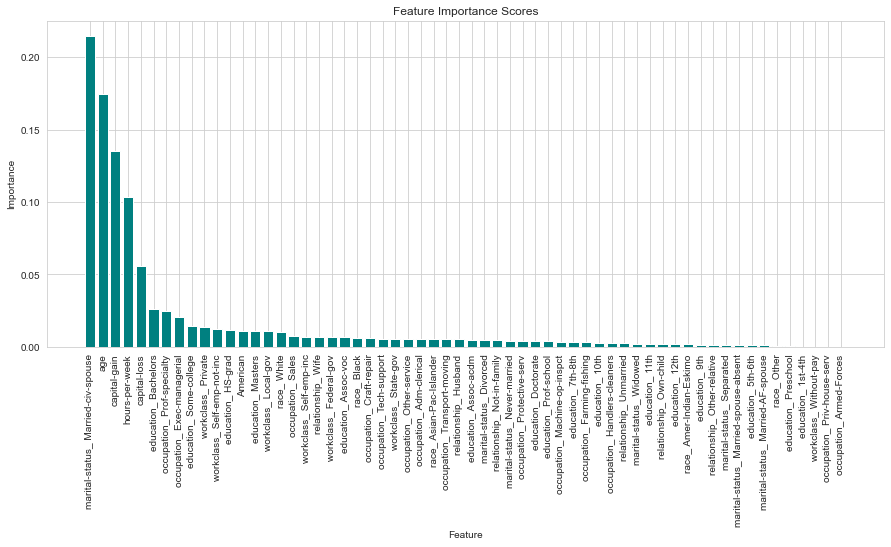

In [53]:
# Create a sorted list of (importance, feature) tuples
feature_importances = sorted(zip(importances, feature_names), reverse=True)

# Extract feature names and importance values into separate lists
features = [f[1] for f in feature_importances]
importance_values = [f[0] for f in feature_importances]

# Create a vertical bar chart to display feature importances
fig, ax = plt.subplots(figsize=(len(features)*0.25, 6))
ax.bar(features, importance_values, color='teal')

# Rotate x-axis tick labels vertically
plt.xticks(rotation=90)

# Set axis labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance Scores')

# Display the plot
plt.show()